In [1]:
import os

import pandas as pd
import numpy as np
import seaborn as sns
import random

from matplotlib import pyplot as plt
from scipy.special import expit
from tqdm import tqdm

from code_base.utils.metrics import score_numpy

/gpfs/helios/home/volodymyr1/src/bird_clef_2025/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
BIRDS = [
    '1139490', '1192948', '1194042', '126247', '1346504', '134933', '135045', '1462711', '1462737', '1564122', '21038', '21116',
    '21211', '22333', '22973', '22976', '24272', '24292', '24322', '41663', '41778', '41970', '42007', '42087', '42113', '46010',
    '47067', '476537', '476538', '48124', '50186', '517119', '523060', '528041', '52884', '548639', '555086', '555142', '566513',
    '64862', '65336', '65344', '65349', '65373', '65419', '65448', '65547', '65962', '66016', '66531', '66578', '66893', '67082',
    '67252', '714022', '715170', '787625', '81930', '868458', '963335', 
    'amakin1', 'amekes', 'ampkin1', 'anhing', 'babwar', 'bafibi1', 'banana', 'baymac', 'bbwduc', 'bicwre1', 'bkcdon', 'bkmtou1', 
    'blbgra1', 'blbwre1', 'blcant4', 'blchaw1', 'blcjay1', 'blctit1', 'blhpar1', 'blkvul', 'bobfly1', 'bobher1', 'brtpar1', 'bubcur1',
    'bubwre1', 'bucmot3', 'bugtan', 'butsal1', 'cargra1', 'cattyr', 'chbant1', 'chfmac1', 'cinbec1', 'cocher1', 'cocwoo1', 'colara1',
    'colcha1', 'compau', 'compot1', 'cotfly1', 'crbtan1', 'crcwoo1', 'crebob1', 'cregua1', 'creoro1', 'eardov1', 'fotfly', 'gohman1',
    'grasal4', 'grbhaw1', 'greani1', 'greegr', 'greibi1', 'grekis', 'grepot1', 'gretin1', 'grnkin', 'grysee1', 'gybmar', 'gycwor1', 
    'labter1', 'laufal1', 'leagre', 'linwoo1', 'littin1', 'mastit1', 'neocor', 'norscr1', 'olipic1', 'orcpar', 'palhor2', 'paltan1',
    'pavpig2', 'piepuf1', 'pirfly1', 'piwtyr1', 'plbwoo1', 'plctan1', 'plukit1', 'purgal2', 'ragmac1', 'rebbla1', 'recwoo1', 'rinkin1',
    'roahaw', 'rosspo1', 'royfly1', 'rtlhum', 'rubsee1', 'rufmot1', 'rugdov', 'rumfly1', 'ruther1', 'rutjac1', 'rutpuf1', 'saffin',
    'sahpar1', 'savhaw1', 'secfly1', 'shghum1', 'shtfly1', 'smbani', 'snoegr', 'sobtyr1', 'socfly1', 'solsan', 'soulap1', 'spbwoo1',
    'speowl1', 'spepar1', 'srwswa1', 'stbwoo2', 'strcuc1', 'strfly1', 'strher', 'strowl1', 'tbsfin1', 'thbeup1', 'thlsch3', 'trokin',
    'tropar', 'trsowl', 'turvul', 'verfly', 'watjac1', 'wbwwre1', 'whbant1', 'whbman1', 'whfant1', 'whmtyr1', 'whtdov', 'whttro1',
    'whwswa1', 'woosto', 'y00678', 'yebela1', 'yebfly1', 'yebsee1', 'yecspi2', 'yectyr1', 'yehbla2', 'yehcar1', 'yelori1', 'yeofly1',
    'yercac1', 'ywcpar', 
]

In [3]:
def convert_fernando_to_vova(input_df):
    output_df = input_df.copy()
    output_df["row_id"] = output_df.apply(lambda row: f"{row['filename']}_{(row['order'] + 1) * 5}", axis=1)
    output_df = output_df.drop(columns=["filename", "order"])
    output_df = output_df[["row_id"] + [col for col in output_df.columns[:-1]]]

    output_df.columns = ["row_id"] + [BIRDS[int(col[1:])] for col in output_df.columns[1:]]
    return output_df

# Load Data

In [4]:
ROOT = "/gpfs/space/projects/BetterMedicine/volodymyr1/exps/bird_clef_2025/kaggle_datasets/fernando_pseudo"

In [5]:
sorted(os.listdir(ROOT))

['b5-predict-unlabeled-0-3-data.zip',
 'oof_unlabeled_ebs.123_f0.pkl',
 'oof_unlabeled_eca.111_f0.pkl',
 'oof_unlabeled_eca.112_f0.pkl',
 'oof_unlabeled_eca.113_f0.pkl',
 'oof_unlabeled_eca.114_f0.pkl',
 'oof_unlabeled_eca.115_f0.pkl',
 'oof_unlabeled_eca.116_f0.pkl',
 'oof_unlabeled_eca.117_f0.pkl',
 'oof_unlabeled_eca.118_f0.pkl',
 'oof_unlabeled_eca.119_f0.pkl',
 'oof_unlabeled_eca.120_f0.pkl',
 'oof_unlabeled_eca.121_f0.pkl',
 'oof_unlabeled_eca.122_f0.pkl',
 'oof_unlabeled_eca.124_f0.pkl',
 'oof_unlabeled_eca.125_f0.pkl',
 'res_ebs.123.pkl',
 'res_eca.111.pkl',
 'res_eca.112.pkl',
 'res_eca.113.pkl',
 'res_eca.114.pkl',
 'res_eca.115.pkl',
 'res_eca.116.pkl',
 'res_eca.117.pkl',
 'res_eca.118.pkl',
 'res_eca.119.pkl',
 'res_eca.120.pkl',
 'res_eca.121.pkl',
 'res_eca.122.pkl',
 'res_eca.124.pkl',
 'res_eca.125.pkl']

In [6]:
all_models = [
    el.split("_")[1].replace(".pkl", "") for el in os.listdir(ROOT) if el.startswith("res")
]
all_models

['eca.124',
 'eca.116',
 'eca.117',
 'eca.112',
 'eca.114',
 'eca.119',
 'eca.122',
 'eca.125',
 'eca.118',
 'eca.113',
 'eca.115',
 'eca.111',
 'ebs.123',
 'eca.120',
 'eca.121']

In [7]:
# sanity check 
for model in tqdm(all_models):
    probs = pd.read_pickle(
        os.path.join(ROOT, "res_" + model + ".pkl")
    )
    logits = pd.read_pickle(
        os.path.join(ROOT, "oof_unlabeled_" + model + "_f0.pkl")
    )
    if not np.allclose(expit(logits), probs.iloc[:,2:].values):
        print("Not close logits and probs for", model)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [00:12<00:00,  1.25it/s]


In [8]:
vova_pseudo = pd.read_csv(
    "../data/pseudo/four_ecas_from_GoodPretrains_879_869_867_866/v0.csv"
)

In [9]:
vova_pseudo

,row_id,compau,41778,bugtan,blkvul,palhor2,labter1,ragmac1,rufmot1,blchaw1,...,recwoo1,smbani,blhpar1,eardov1,y00678,bkcdon,22973,bicwre1,plukit1,yehbla2
0,H31_20230513_141000_5,0.045870,0.000147,0.005081,0.008536,0.001308,0.002476,0.001657,0.001020,0.000732,...,0.002377,0.009777,0.001774,0.022689,0.015460,0.001225,0.000928,0.003084,0.005886,0.002870
1,H31_20230513_141000_10,0.043575,0.000144,0.005227,0.007718,0.001741,0.001916,0.001601,0.001512,0.000817,...,0.002356,0.011685,0.002560,0.016565,0.015357,0.001591,0.000862,0.003446,0.007015,0.003005
2,H31_20230513_141000_15,0.030180,0.000270,0.006190,0.009951,0.014755,0.003388,0.002564,0.001929,0.002369,...,0.003414,0.015688,0.004551,0.022443,0.024111,0.002665,0.001981,0.004401,0.006529,0.004169
3,H31_20230513_141000_20,0.015246,0.000036,0.003789,0.005805,0.000940,0.002758,0.000747,0.000369,0.000797,...,0.002558,0.022259,0.002418,0.015462,0.022913,0.002244,0.000736,0.004057,0.003807,0.010508
4,H31_20230513_141000_25,0.011199,0.000038,0.006356,0.016538,0.001177,0.003021,0.000790,0.000375,0.000956,...,0.002628,0.021939,0.001881,0.023664,0.021750,0.002578,0.000558,0.005886,0.005562,0.028656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116707,H17_20230518_130500_40,0.036541,0.000184,0.001562,0.004437,0.001391,0.000432,0.001068,0.017897,0.000426,...,0.000787,0.001755,0.002394,0.002582,0.001734,0.000954,0.000926,0.000392,0.004318,0.000304
116708,H17_20230518_130500_45,0.027110,0.000494,0.001787,0.004217,0.001858,0.000392,0.000981,0.006312,0.000496,...,0.001361,0.001598,0.003593,0.001612,0.002647,0.000973,0.001030,0.000605,0.005584,0.000474
116709,H17_20230518_130500_50,0.017330,0.000167,0.005166,0.001872,0.000891,0.000197,0.000795,0.006188,0.000558,...,0.001594,0.001525,0.002429,0.001782,0.001641,0.000803,0.000635,0.000733,0.004082,0.000316
116710,H17_20230518_130500_55,0.053683,0.000368,0.003271,0.005571,0.005543,0.000255,0.000998,0.005725,0.000965,...,0.001615,0.001783,0.002764,0.002067,0.004264,0.000901,0.001207,0.000581,0.006279,0.000621


In [10]:
df_dict = dict()
for model_name in tqdm(all_models):
    df_dict[model_name] = convert_fernando_to_vova(pd.read_pickle(os.path.join(ROOT, "res_" + model_name + ".pkl")))
    df_dict[model_name] = df_dict[model_name][vova_pseudo.columns]

    df_dict[model_name] = df_dict[model_name].set_index("row_id").loc[vova_pseudo["row_id"]].reset_index()

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [00:36<00:00,  2.42s/it]


# Compute metrics

In [11]:
df_dict.keys()

dict_keys(['eca.124', 'eca.116', 'eca.117', 'eca.112', 'eca.114', 'eca.119', 'eca.122', 'eca.125', 'eca.118', 'eca.113', 'eca.115', 'eca.111', 'ebs.123', 'eca.120', 'eca.121'])

In [12]:
df_dict["eca.124"]

,row_id,compau,41778,bugtan,blkvul,palhor2,labter1,ragmac1,rufmot1,blchaw1,...,recwoo1,smbani,blhpar1,eardov1,y00678,bkcdon,22973,bicwre1,plukit1,yehbla2
0,H31_20230513_141000_5,0.170398,0.024583,0.042871,0.076501,0.039459,0.038303,0.029667,0.040029,0.024414,...,0.025218,0.091314,0.046270,0.106383,0.076269,0.027622,0.036972,0.041495,0.081051,0.026456
1,H31_20230513_141000_10,0.127448,0.017107,0.037400,0.060095,0.038291,0.029604,0.025730,0.030528,0.026018,...,0.020428,0.108814,0.044119,0.106196,0.065433,0.020434,0.034395,0.038576,0.072574,0.021264
2,H31_20230513_141000_15,0.105520,0.013061,0.039359,0.056260,0.079328,0.028981,0.025075,0.042388,0.023438,...,0.023182,0.075798,0.041775,0.079064,0.066961,0.015346,0.040979,0.036170,0.065423,0.016512
3,H31_20230513_141000_20,0.090638,0.013685,0.043687,0.060084,0.025486,0.037240,0.021344,0.022752,0.017936,...,0.033621,0.159670,0.043225,0.079369,0.058103,0.020436,0.033180,0.030948,0.068404,0.027082
4,H31_20230513_141000_25,0.087034,0.021211,0.052784,0.058497,0.027450,0.036940,0.023226,0.025266,0.019418,...,0.035494,0.170803,0.040014,0.096588,0.067514,0.032248,0.049821,0.056313,0.079155,0.041544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116707,H17_20230518_130500_40,0.128958,0.048475,0.042699,0.064958,0.035533,0.049690,0.062794,0.094853,0.041304,...,0.067718,0.057391,0.049889,0.055772,0.067841,0.048892,0.061412,0.047146,0.142130,0.038577
116708,H17_20230518_130500_45,0.110038,0.023327,0.040379,0.047367,0.025593,0.032504,0.038956,0.038383,0.024602,...,0.037070,0.051619,0.040039,0.041677,0.044977,0.026060,0.050947,0.051982,0.133579,0.025841
116709,H17_20230518_130500_50,0.081810,0.028842,0.052317,0.034016,0.042095,0.028785,0.035116,0.068824,0.020529,...,0.048298,0.046212,0.054306,0.051249,0.046540,0.026625,0.041728,0.046154,0.078599,0.026492
116710,H17_20230518_130500_55,0.113031,0.023420,0.048375,0.045926,0.036217,0.030125,0.044093,0.060630,0.052149,...,0.037709,0.066211,0.045096,0.051053,0.092162,0.033846,0.061047,0.031654,0.101903,0.024772


In [13]:
vova_pseudo_hard = vova_pseudo.copy()
vova_pseudo_hard.iloc[:,1:] = (vova_pseudo_hard.iloc[:,1:].values > 0.5).astype(int)

In [14]:
for model_name in all_models:
    print(f"Score for {model_name}:", score_numpy(
            vova_pseudo_hard.iloc[:,1:].values.astype(int), 
            df_dict[model_name].iloc[:,1:].values
    ))

Score for eca.124: 0.998031750036144
Score for eca.116: 0.9968995405622556
Score for eca.117: 0.9979632573794175
Score for eca.112: 0.9971210209891785
Score for eca.114: 0.9971240495091857
Score for eca.119: 0.9978544030844597
Score for eca.122: 0.9981575045979537
Score for eca.125: 0.9980331268283581
Score for eca.118: 0.9973704565562475
Score for eca.113: 0.9978375840629803
Score for eca.115: 0.997922871739473
Score for eca.111: 0.997657454419067
Score for ebs.123: 0.9962560950508224
Score for eca.120: 0.9977101547220419
Score for eca.121: 0.9981321809896636


In [35]:
fernando_df = pd.read_excel("results v8(1).xlsx", sheet_name="add")

In [42]:
assert fernando_df["Unnamed: 1"].iloc[1:].shape[0] == fernando_df["Unnamed: 12"].iloc[1:].shape[0]

fernando_scores = {
    m_n: (lb_score if isinstance(lb_score, float) and not pd.isna(lb_score) else None) for m_n, lb_score in zip(fernando_df["Unnamed: 1"].iloc[1:], fernando_df["Unnamed: 12"].iloc[1:])
}
fernando_scores

{'eca.111': 0.844,
 'eca.112': 0.855,
 'eca.113': 0.855,
 'eca.114': 0.839,
 'eca.115': None,
 'eca.116': None,
 'eca.117': 0.854,
 'eca.118': 0.862,
 'eca.119': None,
 'eca.120': 0.852,
 'eca.121': 0.854,
 'eca.122': 0.85,
 'ebs.123': 0.852,
 'eca.124': 0.857,
 'eca.125': 0.85,
 'eca.126': 0.862}

In [44]:
all_models

['eca.124',
 'eca.116',
 'eca.117',
 'eca.112',
 'eca.114',
 'eca.119',
 'eca.122',
 'eca.125',
 'eca.118',
 'eca.113',
 'eca.115',
 'eca.111',
 'ebs.123',
 'eca.120',
 'eca.121']

# EDA

In [16]:
def plot_probs(input_df, df_name):
    test_preds = input_df.iloc[:,1:].values
    plt.title(f"{df_name}. Most 'Probable' class probability distribution")
    plt.hist(test_preds.max(axis=1), bins=30)
    plt.show()
    print(
        "Max Prob: ", test_preds.max(), 
        "Min Prob: ", test_preds.min(),
        "Median Prob: ", np.median(test_preds)
    )

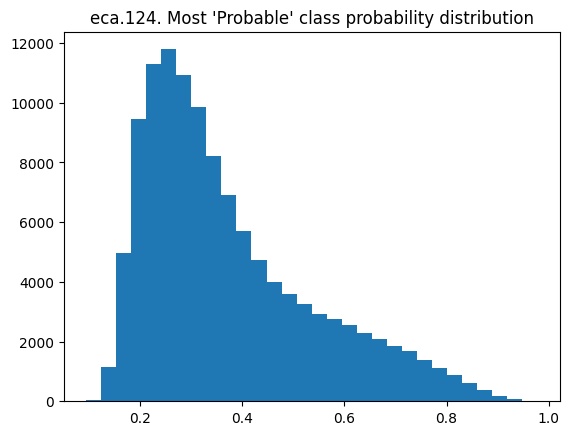

Max Prob:  0.97716856 Min Prob:  0.0008629908 Median Prob:  0.04250016


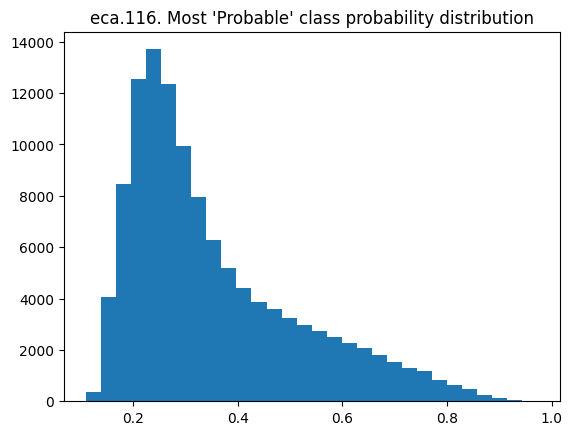

Max Prob:  0.9717633 Min Prob:  0.0008402518 Median Prob:  0.045839503


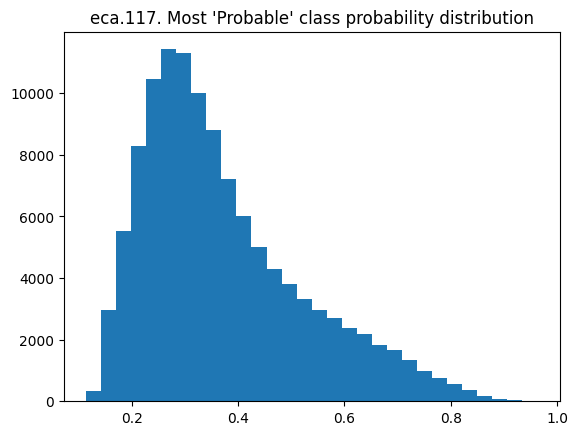

Max Prob:  0.9622164 Min Prob:  0.00050751533 Median Prob:  0.04819443


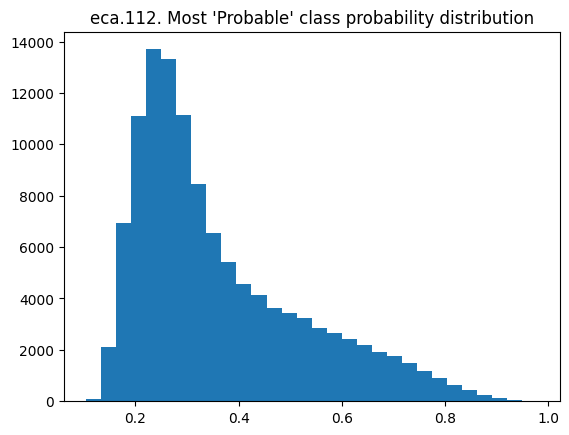

Max Prob:  0.9784968 Min Prob:  0.00071208144 Median Prob:  0.04409582


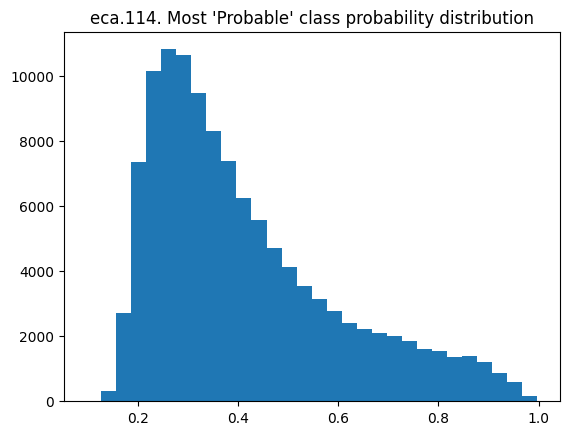

Max Prob:  0.9967848 Min Prob:  0.0001240478 Median Prob:  0.037788216


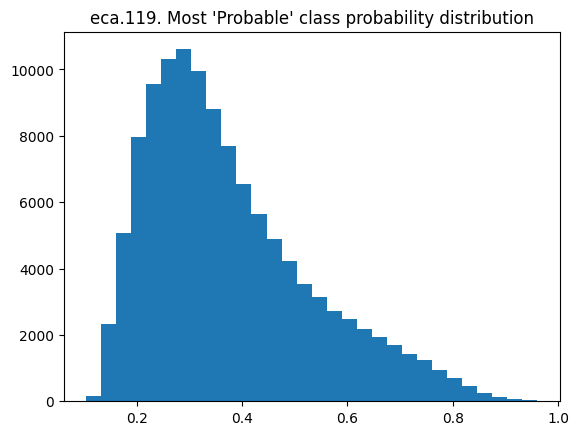

Max Prob:  0.9602109 Min Prob:  0.000980554 Median Prob:  0.04449921


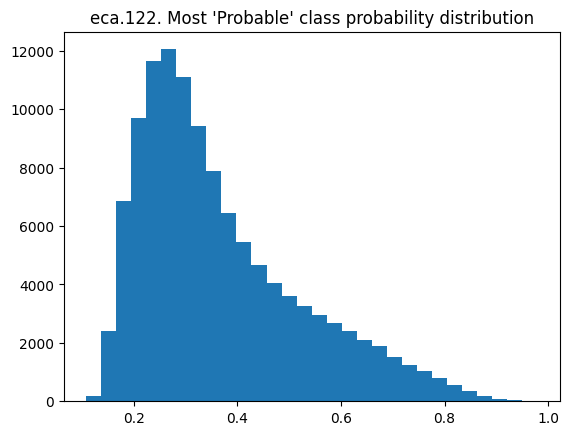

Max Prob:  0.97842807 Min Prob:  0.0005593336 Median Prob:  0.04568963


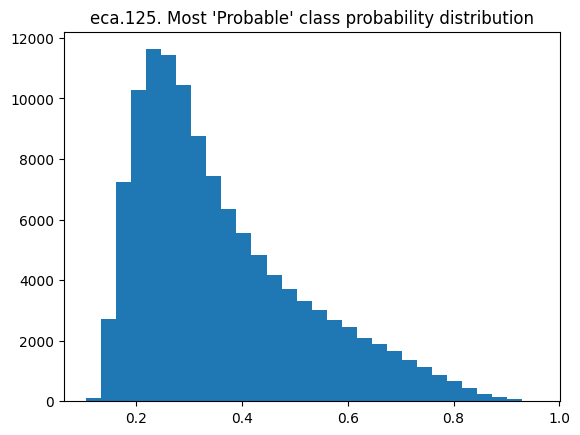

Max Prob:  0.95764107 Min Prob:  0.0006865479 Median Prob:  0.044571657


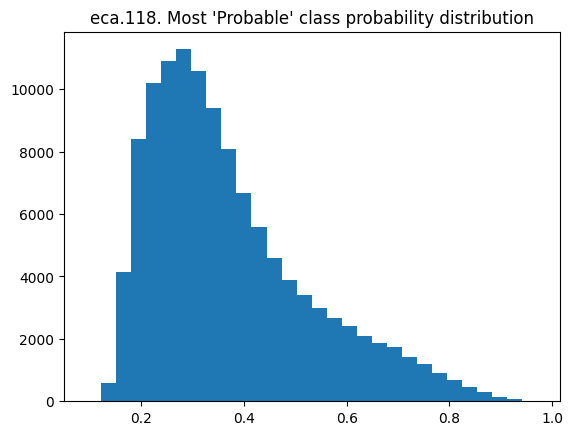

Max Prob:  0.97052854 Min Prob:  0.0005781598 Median Prob:  0.0433148


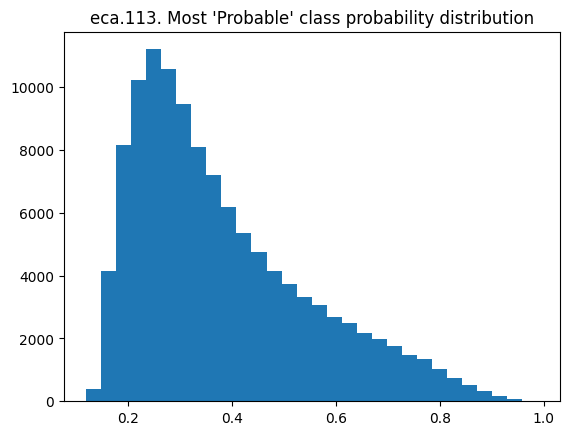

Max Prob:  0.9868798 Min Prob:  0.0011962838 Median Prob:  0.048790414


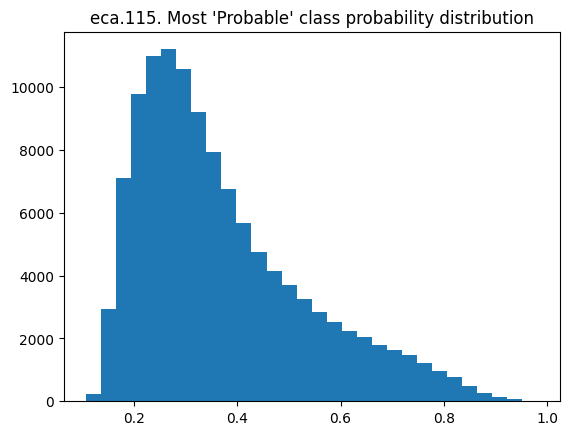

Max Prob:  0.98022276 Min Prob:  0.00014831105 Median Prob:  0.04013798


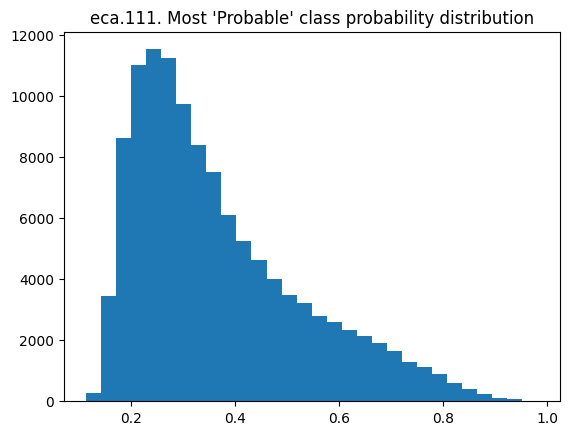

Max Prob:  0.98091644 Min Prob:  0.00032568537 Median Prob:  0.045386255


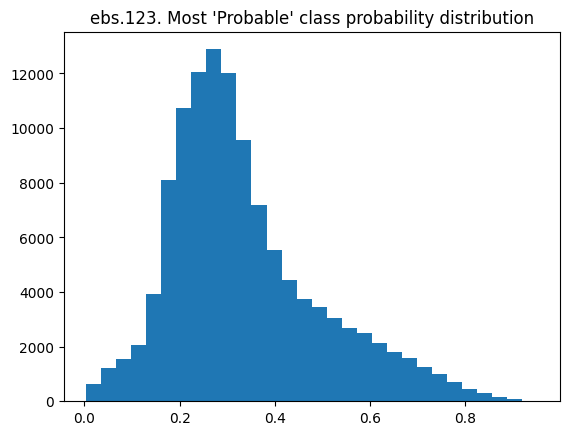

Max Prob:  0.9512099 Min Prob:  5.302558e-06 Median Prob:  0.03806412


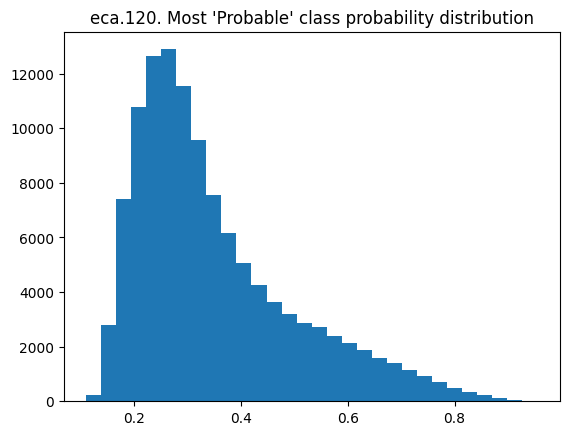

Max Prob:  0.9542602 Min Prob:  0.0014008377 Median Prob:  0.044317476


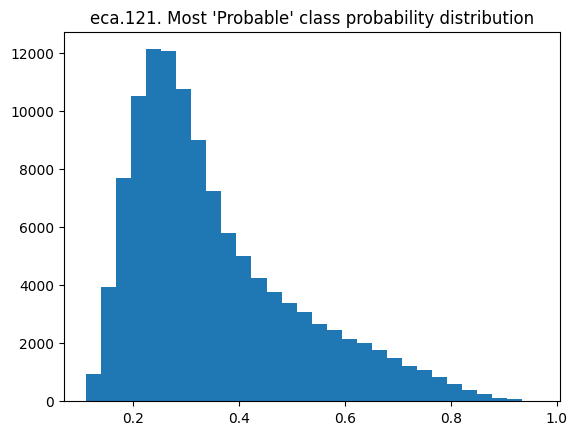

Max Prob:  0.9629216 Min Prob:  0.0014749132 Median Prob:  0.05329208


In [17]:
for model_name in all_models:
    plot_probs(
        input_df=df_dict[model_name],
        df_name=model_name
    )

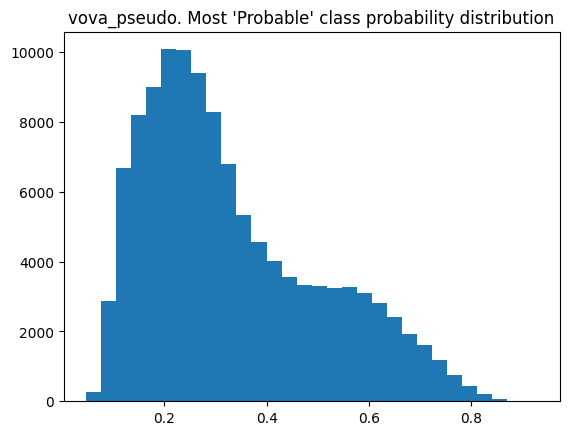

Max Prob:  0.9293066263198853 Min Prob:  1.894880483632733e-07 Median Prob:  0.0019427418010309


In [19]:
plot_probs(vova_pseudo, "vova_pseudo")

# Compose Final Pseudo DF

In [45]:
all_models

['eca.124',
 'eca.116',
 'eca.117',
 'eca.112',
 'eca.114',
 'eca.119',
 'eca.122',
 'eca.125',
 'eca.118',
 'eca.113',
 'eca.115',
 'eca.111',
 'ebs.123',
 'eca.120',
 'eca.121']

In [58]:
pseudo_df = df_dict["eca.111"].copy()
pseudo_df.iloc[:,1:] = 0
n_pseudo_models = 0
pseudo_name = ""
for m_name in all_models:
    if fernando_scores[m_name] is not None and fernando_scores[m_name] > 0.85:
        print(m_name)
        pseudo_df.iloc[:,1:] += df_dict[m_name]
        n_pseudo_models += 1
        pseudo_name += m_name.replace(".", "_") + "__"
pseudo_name = pseudo_name[:-2]      
pseudo_df.iloc[:,1:] /= n_pseudo_models

eca.124
eca.117
eca.112
eca.118
eca.113
ebs.123
eca.120
eca.121


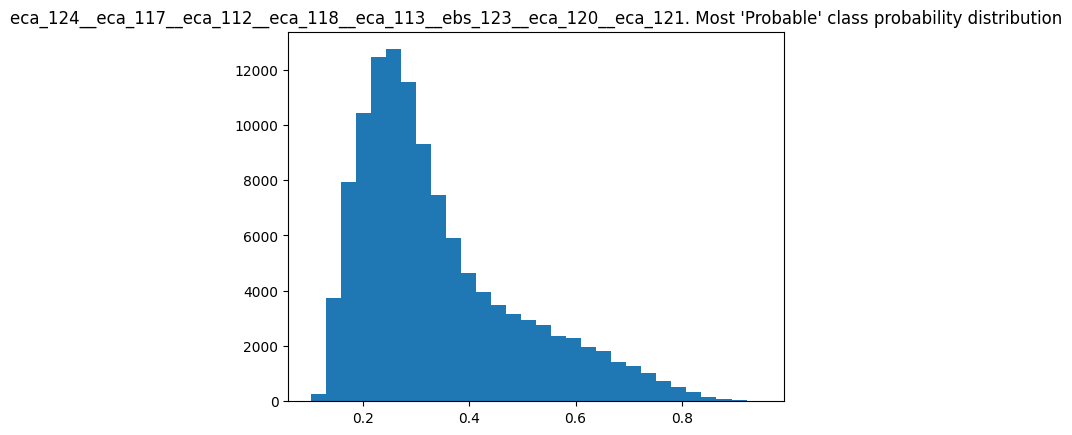

Max Prob:  0.9493783 Min Prob:  0.0022258582 Median Prob:  0.0461628


In [59]:
plot_probs(pseudo_df, pseudo_name)

In [61]:
CLASSES = pseudo_df.columns[1:].to_list()
primary_label = [CLASSES[argmax_idx] for argmax_idx in np.argmax(pseudo_df.iloc[:,1:].values, axis=1)]
primary_label_prob = np.max(pseudo_df.iloc[:,1:].values, axis=1)
pseudo_df["primary_label"] = primary_label
pseudo_df["primary_label_prob"] = primary_label_prob

pseudo_df

,row_id,compau,41778,bugtan,blkvul,palhor2,labter1,ragmac1,rufmot1,blchaw1,...,blhpar1,eardov1,y00678,bkcdon,22973,bicwre1,plukit1,yehbla2,primary_label,primary_label_prob
0,H31_20230513_141000_5,0.159264,0.023911,0.039142,0.079464,0.024616,0.037066,0.028624,0.031348,0.019430,...,0.038597,0.090345,0.097343,0.023590,0.038945,0.046349,0.079031,0.038333,amekes,0.227030
1,H31_20230513_141000_10,0.121143,0.014837,0.032005,0.065363,0.023624,0.029896,0.026074,0.028381,0.015777,...,0.036781,0.078994,0.079275,0.019191,0.030506,0.038033,0.075968,0.031824,amekes,0.165087
2,H31_20230513_141000_15,0.098991,0.015388,0.031712,0.057469,0.056621,0.029623,0.034625,0.036181,0.018756,...,0.041341,0.066904,0.085386,0.019813,0.038372,0.034734,0.061722,0.034680,amekes,0.181637
3,H31_20230513_141000_20,0.072614,0.016175,0.035011,0.058657,0.024750,0.041689,0.024002,0.024115,0.022256,...,0.038266,0.064376,0.067339,0.023860,0.032150,0.029310,0.057723,0.046422,bbwduc,0.192418
4,H31_20230513_141000_25,0.092274,0.024038,0.047987,0.074968,0.024672,0.041400,0.025602,0.026328,0.022165,...,0.036980,0.080916,0.093589,0.029676,0.048920,0.043267,0.075727,0.078906,bbwduc,0.235213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116707,H17_20230518_130500_40,0.134220,0.051130,0.047331,0.090751,0.038796,0.038137,0.055249,0.084629,0.040647,...,0.058780,0.071565,0.063093,0.044093,0.065391,0.053944,0.120297,0.042928,bucmot3,0.558724
116708,H17_20230518_130500_45,0.121311,0.024010,0.038398,0.060381,0.021614,0.024168,0.032081,0.049055,0.023998,...,0.045805,0.047794,0.046117,0.025538,0.051993,0.036826,0.129678,0.028358,50186,0.412233
116709,H17_20230518_130500_50,0.099042,0.034593,0.050029,0.045669,0.030774,0.025995,0.039800,0.070910,0.023501,...,0.058303,0.050505,0.051910,0.026008,0.044320,0.043670,0.086061,0.028183,banana,0.262907
116710,H17_20230518_130500_55,0.104460,0.031320,0.051891,0.061192,0.042540,0.025449,0.039354,0.055105,0.042842,...,0.051263,0.055507,0.071605,0.032108,0.055938,0.034928,0.088768,0.032214,50186,0.215810


In [62]:
pseudo_df.drop(columns=CLASSES)

,row_id,primary_label,primary_label_prob
0,H31_20230513_141000_5,amekes,0.227030
1,H31_20230513_141000_10,amekes,0.165087
2,H31_20230513_141000_15,amekes,0.181637
3,H31_20230513_141000_20,bbwduc,0.192418
4,H31_20230513_141000_25,bbwduc,0.235213
...,...,...,...
116707,H17_20230518_130500_40,bucmot3,0.558724
116708,H17_20230518_130500_45,50186,0.412233
116709,H17_20230518_130500_50,banana,0.262907
116710,H17_20230518_130500_55,50186,0.215810


In [64]:
save_path = os.path.join("../data/pseudo/", pseudo_name)
os.makedirs(save_path)
pseudo_df.to_csv(
    os.path.join("../data/pseudo/", pseudo_name, "v0_0.csv"), index=False
)